In [1]:
import pandas as pd
import numpy as np
import sklearn
import pickle 
import time 
import datetime
import warnings
import matplotlib.pyplot as plt
import torch
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import graft
import torch_geometric


In [2]:
with open('./fraudTrain.pkl', 'rb') as file:
    fraudTrain = pickle.load(file)    

In [3]:
df_test = pd.read_csv('~/Dropbox/Data/df_test.csv')

In [4]:
df = df_test[df_test['amt'] <= 80]
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-10-12 18:21:00,4.089100e+18,"fraud_Haley, Jewess and Bechtelar",shopping_pos,7.53,Debra,Stark,F,686 Linda Rest,Kilgore,...,32.3836,-94.8653,24536,Multimedia programmer,1983-10-14,d313353fa30233e5fab5468e852d22fc,1350066071,32.202008,-94.371865,0
1,2019-01-20 13:06:00,4.247920e+12,fraud_Turner LLC,travel,3.79,Judith,Moss,F,46297 Benjamin Plains Suite 703,Washington Court House,...,39.5370,-83.4550,22305,Television floor manager,1939-03-09,88c65b4e1585934d578511e627fe3589,1327064760,39.156673,-82.930503,0
2,2019-03-24 18:09:00,4.026220e+12,fraud_Klein Group,entertainment,59.07,Debbie,Payne,F,204 Ashley Neck Apt. 169,Preston,...,41.5224,-71.9934,4720,Broadcast presenter,1977-05-18,3bd9ede04b5c093143d5e5292940b670,1332612553,41.657152,-72.595751,0
3,2020-02-25 15:12:00,4.957920e+12,fraud_Monahan-Morar,personal_care,25.58,Alan,Parsons,M,0547 Russell Ford Suite 574,Kirk,...,39.6171,-102.4776,207,Network engineer,1955-12-04,19e16ee7a01d229e750359098365e321,1361805120,39.080346,-103.213452,0
5,2020-01-17 12:52:00,4.328930e+15,fraud_Stoltenberg-Beatty,shopping_pos,20.59,Margaret,Ray,F,927 Cummings Manor Suite 318,Greendale,...,42.9373,-87.9943,13973,Logistics and distribution manager,1981-05-06,5c09ec083ce8e0a02fa257ceaaffd89c,1358427176,43.804237,-87.715986,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314538,2019-07-22 13:00:00,4.917190e+15,"fraud_Hintz, Bauch and Smith",health_fitness,19.68,Joel,Rivera,M,121 Solis Summit Apt. 934,Tryon,...,35.8759,-96.9623,1165,"Psychotherapist, child",1944-11-11,5d9b81a4b1794d8db7ff312c4f4aa8d6,1342962031,36.631112,-97.721885,1
314558,2019-04-29 03:58:00,3.423510e+14,fraud_Gutmann Ltd,grocery_net,12.43,Rebecca,Obrien,F,5619 Mendoza Inlet,Juliette,...,33.1194,-83.8235,3343,Theatre manager,1990-06-08,d5bec8b265bbb126192d85a3644f47d2,1335671882,33.237073,-84.155467,1
314563,2019-04-25 23:24:00,3.556610e+15,fraud_Kautzer and Sons,personal_care,20.51,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,5191b149131485051f020c0f67a87523,1335396296,29.871618,-95.823992,1
314566,2020-01-04 23:23:00,3.523840e+15,fraud_Parker-Kunde,personal_care,17.83,Grace,Williams,F,28812 Charles Mill Apt. 628,Plantersville,...,32.6176,-86.9475,1412,Drilling engineer,1970-11-20,bde542653fff0ccfa1196af32a374b66,1357341838,33.054015,-87.130221,1


In [5]:
cc_amt_80 = list(set(df['cc_num']))

<Axes: >

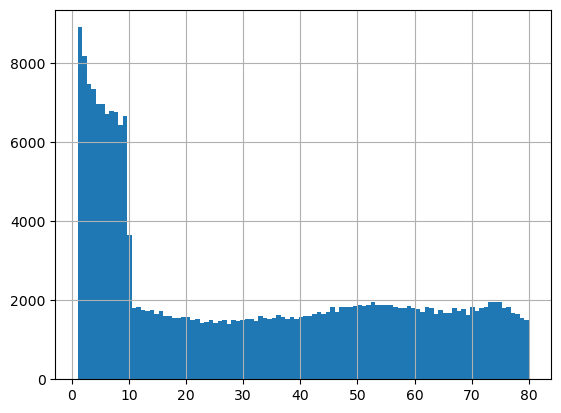

In [6]:
df['amt'].hist(bins=100)

In [7]:
df_fraud = df[df.is_fraud == 1]
df_fraud_cc = list(set(df_fraud['cc_num']))

In [8]:
df2 = df[df['cc_num'].isin(df_fraud_cc)]

In [9]:

df2 = df[df['cc_num'].isin(df_fraud_cc)].reset_index()
df_group = df2.groupby("cc_num")["is_fraud"].agg(['count', 'sum']).reset_index()
df_group.columns = ['cc_num', 'total_transactions', 'fraud_transactions']
first = df2.groupby('cc_num')['first'].first().reset_index() 
last = df2.groupby('cc_num')['last'].first().reset_index()
name = first['first'] + ' ' + last['last']
df_group['name'] = name
df_group.insert(1, 'name', df_group.pop('name'))
df_group.sort_values(by=['total_transactions', 'fraud_transactions'], ascending=[True, True])

,cc_num,name,total_transactions,fraud_transactions
3,5.018510e+11,Sydney Morales,1,1
23,4.076170e+12,Bradley Adkins,1,1
30,4.457490e+12,John Ross,1,1
63,3.881750e+13,Molly Marshall,1,1
95,3.756230e+14,Karen Brewer,1,1
...,...,...,...,...
156,3.553630e+15,Sharon Johnson,578,1
202,4.642260e+15,Sabrina Johnson,606,1
7,5.713650e+11,Barbara Taylor,610,1
194,4.364010e+15,Gary Martinez,645,2


In [10]:
# df_group.to_csv('df_group.csv', index=False)

In [10]:
def compute_time_difference(group):
    n = len(group)
    result = []
    for i in range(n):
        for j in range(n):
            time_difference = abs((group.iloc[i].trans_date_trans_time - group.iloc[j].trans_date_trans_time).total_seconds())
            result.append([group.index[i], group.index[j], time_difference])
    return result

In [12]:
all_graphs = []

unique_cc_nums = df2['cc_num'].unique()
for c_sample in unique_cc_nums:
    groups = df2[df2['cc_num'] == c_sample]
    
    if len(groups) < 2:
        continue  # Skip if there are not enough transactions to form edges
    
    edge_index = compute_time_difference(groups)
    edge_index = np.array(edge_index).astype(np.float64)
    edge_index = edge_index[edge_index[:, 0] != edge_index[:, 1]]
    
    if len(edge_index) == 0:
        continue  # Skip if no valid edges were formed
    
    theta = 1e7
    edge_index[:, 2] = (np.exp(-edge_index[:, 2] / theta) != 1) * (np.exp(-edge_index[:, 2] / theta))
    edge_index = edge_index.tolist()
    
    selected_indices = groups.index
    is_fraud_values = df2.loc[selected_indices, 'is_fraud'].tolist()
    
    unique_nodes = set(np.array(edge_index)[:, :2].reshape(-1).tolist())
    dict_map = {n: i for i, n in enumerate(unique_nodes)}
    
    source, target = np.array(edge_index)[:, 0], np.array(edge_index)[:, 1]
    edge_index_selected = torch.tensor([[dict_map[s] for s in source.tolist()], [dict_map[t] for t in target.tolist()]])
    
    graph = torch_geometric.data.Data(
        edge_index=edge_index_selected,
        edge_attr=torch.tensor(np.array(edge_index)[:, -1], dtype=torch.float),
        x=torch.tensor(groups['amt'].values, dtype=torch.float).unsqueeze(1),  # Assuming 'amt' is the feature
        y=torch.tensor(groups['is_fraud'].values, dtype=torch.long)
    )

    graph.cc_num = c_sample
    all_graphs.append(graph)

In [13]:
with open('all_graphs5.pkl', 'wb') as f:
    pickle.dump(all_graphs, f)

In [14]:

dr_opts = { 
    'output_size': (500,500),
    'edge_marker_size': 1,
    #'output':"ten-nodes.pdf",
}

In [15]:
graph_number = 60

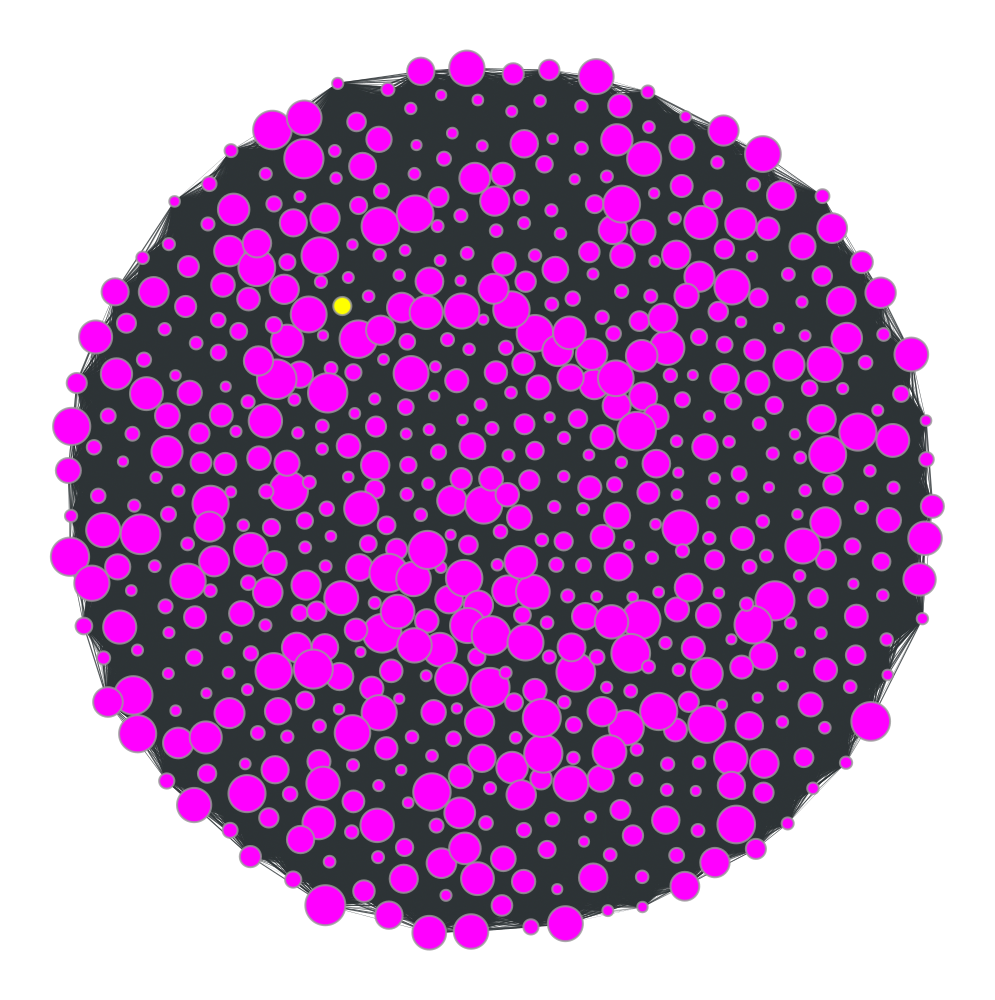

571365000000.0

In [16]:

graft.graph.plot_undirected_weighted(
    all_graphs[graph_number],
    node_color=all_graphs[graph_number].y,
    node_size=all_graphs[graph_number].x,
    edge_weight_text=False,
    draw_options= dr_opts,
)
all_graphs[graph_number].cc_num

In [ ]:
df

---

시간 차이가 1일 이하인 것만 그룹으로 뽑아서 저 그림을 그려봐야 할 것 같다.
위에처럼 그림이 나와서 너무 이상함